<a href="https://colab.research.google.com/github/NaumanAnwar97/RandomForest/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest
## ML Lab
## Nauman Anwar (i220123)

In [2]:
import pandas as pd
import numpy as np

# Train Data

train_df = pd.read_csv("./train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
import numpy as np

percentage_null = (train_df.isnull().sum()/len(train_df) * 100).sort_values(ascending=False)
np.round(percentage_null.head(19), 2)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [4]:
# Dropping feature with over 50% missing values
train_df.drop(columns=['Alley','Fence','MiscFeature','PoolQC','MasVnrType'], axis=1 , inplace= True)

In [5]:
# Getting num columns and categorical columns
train_df_num = train_df.select_dtypes(include = ["float64", "int64"])
train_df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:

train_df_categ = train_df.select_dtypes(exclude = ["float64", "int64"])
train_df_categ.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


### Dropping highly correlated columns



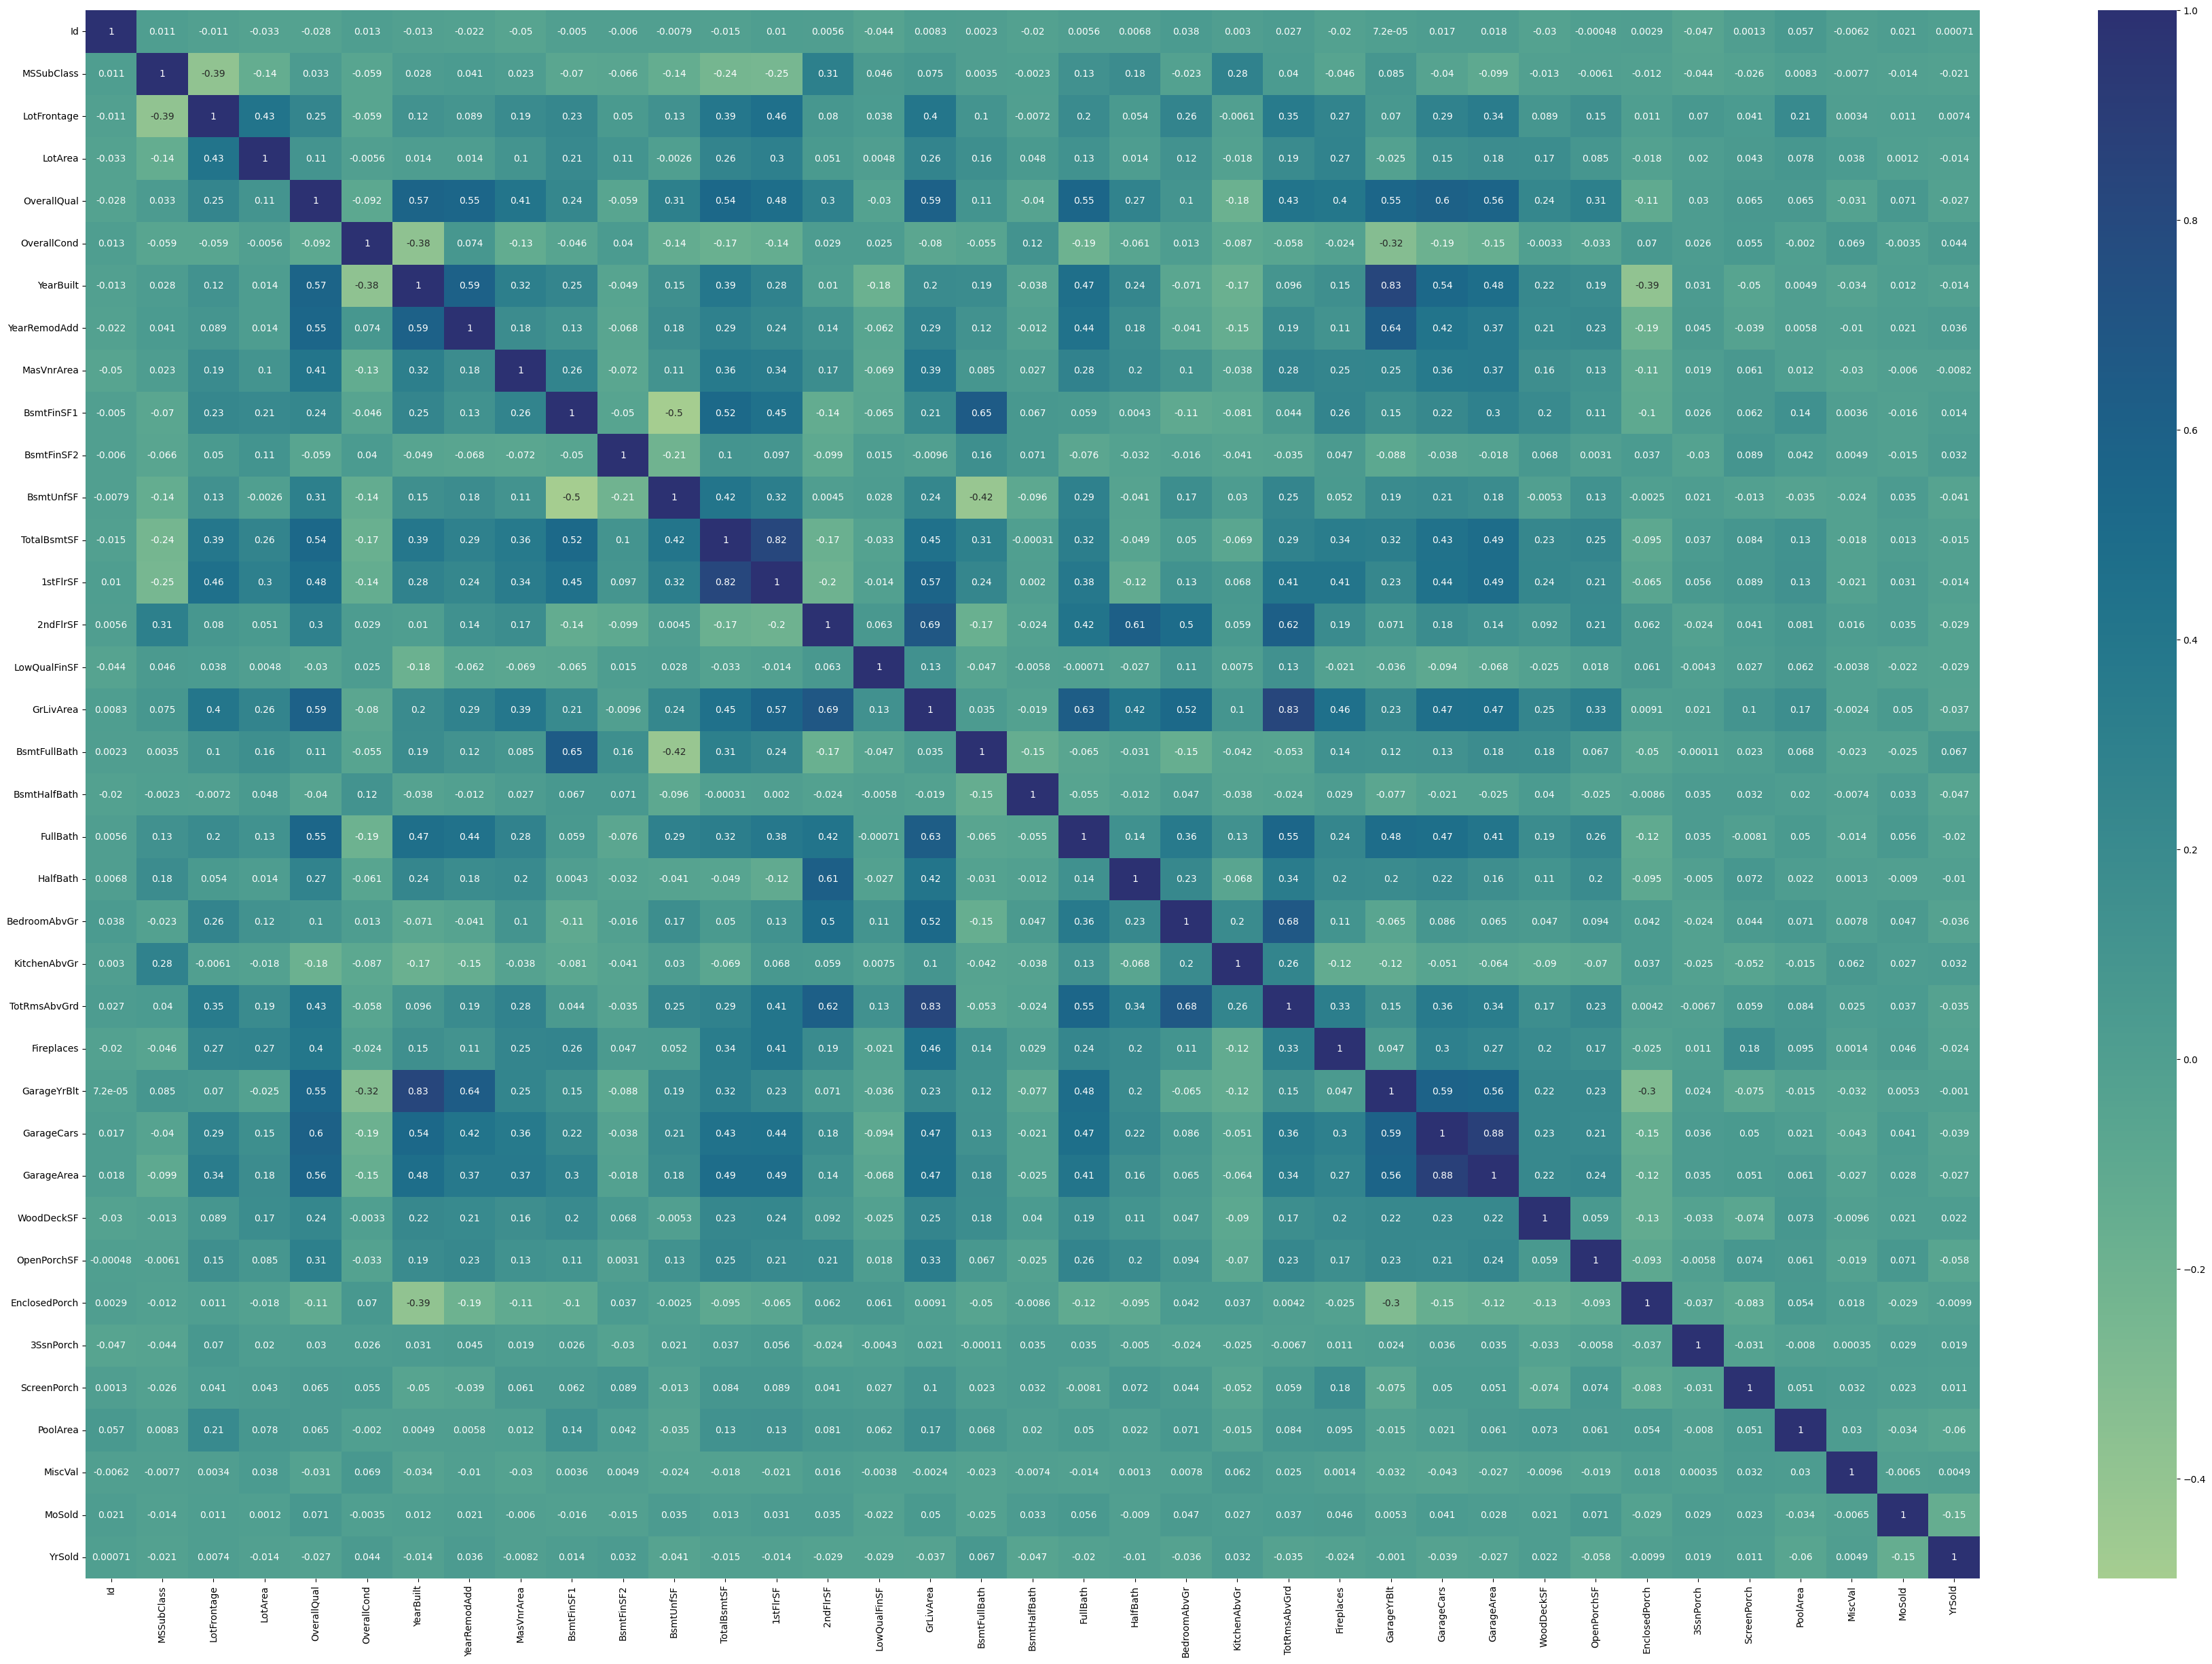

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr  = train_df_num.drop('SalePrice', axis = 1).corr()

fig , ax = plt.subplots(figsize=(45 , 30))

sns.heatmap(corr ,annot= True , ax=ax , cmap= 'crest');

In [8]:
train_df.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SalePri

### Comparing correlation between high correlated features and the target

In [9]:
train_df["TotalBsmtSF"].corr(train_df_num["1stFlrSF"]), train_df_num['TotalBsmtSF'].corr(train_df["SalePrice"]), train_df_num['1stFlrSF'].corr(train_df["SalePrice"])

(0.8195299750050337, 0.6135805515591956, 0.6058521846919147)

In [10]:
train_df["TotRmsAbvGrd"].corr(train_df['GrLivArea']), train_df["TotRmsAbvGrd"].corr(train_df["SalePrice"]), train_df['GrLivArea'].corr(train_df['SalePrice'])

(0.8254893743088427, 0.5337231555820282, 0.7086244776126523)

In [11]:
train_df_num['GarageYrBlt'].corr(train_df_num['YearBuilt']), train_df_num['GarageYrBlt'].corr(train_df['SalePrice']), train_df_num['YearBuilt'].corr(train_df['SalePrice'])

(0.8256674841743421, 0.48636167748786097, 0.5228973328794969)

In [12]:
train_df['GarageArea'].corr(train_df['GarageCars']), train_df['GarageArea'].corr(train_df['SalePrice']), train_df['GarageCars'].corr(train_df['SalePrice'])

(0.8824754142814625, 0.6234314389183618, 0.6404091972583529)

### Dropping columns that are less correlated with target

In [13]:
train_df.drop(columns= ['GarageArea' ,'GarageYrBlt', 'TotRmsAbvGrd' , '1stFlrSF', '2ndFlrSF', "Id"] , axis=1 , inplace= True)

In [15]:
train_df_num = train_df.select_dtypes(include = ["float64", "int64"])
train_df_categ = train_df.select_dtypes(exclude = ["float64", "int64"])
train_df_num.drop('SalePrice', axis =1, inplace = True)

In [16]:
## Getting num and categorical columns after column drops

In [17]:
train_df_num = train_df.select_dtypes(include = ["float64", "int64"])
train_df_categ = train_df.select_dtypes(exclude = ["float64", "int64"])
train_df_num.drop('SalePrice', axis =1, inplace = True)

### Getting features and labels

In [18]:
X_train = train_df.drop('SalePrice', axis = 1)
y_train = train_df["SalePrice"]

In [63]:
# !pip install scikit-optimize


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, train_df_num.columns.to_list()),
        ('cat', categorical_transformer, train_df_categ.columns.to_list())])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', RandomForestRegressor(n_estimators =25))])

clf.fit(X_train, y_train)

ValueError: ignored

In [53]:
X_test = pd.read_csv('./test.csv')

In [54]:
model_preds = clf.predict(X_test)
model_preds

array([124548., 163524., 178308., ..., 155482., 119164., 228448.])

## Prediction of new Observation

In [65]:
submission = pd.DataFrame(X_test["Id"])
submission["SalePrice"] = model_preds
submission.to_csv("sample_submission.csv", index = False)
submission

,Id,SalePrice
0,1461,124548.0
1,1462,163524.0
2,1463,178308.0
3,1464,176644.0
4,1465,194516.0
...,...,...
1454,2915,91208.0
1455,2916,90438.0
1456,2917,155482.0
1457,2918,119164.0
